<h1>Codenation ENEM</h1>
<h2>Descubra as melhores notas de matemática do ENEM 2016</h2>

Modelo para prever a nota da prova de matemática de quem participou do ENEM 2016.

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação.

Feito por Alessandra Faria Abreu - ouvindo uma playlist de musicas dos anos 2000 durante a aula de banco 2

<h2>Trabalhando a Base</h2>

In [119]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [76]:
#Realiza a leitura da base (csv) e carrega na mémoria
enemTrain = pd.read_csv('train.csv')
enemTest = pd.read_csv('test.csv')

<h3>Analisando a Base de Dados</h3>

In [77]:
#verificando o tamanho da Base
enemTrain.shape

(13730, 167)

In [78]:
#Verificando os nomes das colunas
enemTrain.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [79]:
#vendo os 5 primeiros registros
enemTrain.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [80]:
#verificando a tipagem dos dados
enemTrain.dtypes

Unnamed: 0                  int64
NU_INSCRICAO               object
NU_ANO                      int64
CO_MUNICIPIO_RESIDENCIA     int64
NO_MUNICIPIO_RESIDENCIA    object
                            ...  
Q046                       object
Q047                       object
Q048                       object
Q049                       object
Q050                       object
Length: 167, dtype: object

In [81]:
#Verificando valores nulos
total = enemTrain.isnull().sum().sort_values(ascending=False)
percent = (enemTrain.isnull().sum()/enemTrain.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
CO_UF_ENTIDADE_CERTIFICACAO,12092,0.880699
NO_ENTIDADE_CERTIFICACAO,12092,0.880699
SG_UF_ENTIDADE_CERTIFICACAO,12092,0.880699
Q041,10792,0.786016
TP_SIT_FUNC_ESC,9448,0.688128
TP_LOCALIZACAO_ESC,9448,0.688128
TP_DEPENDENCIA_ADM_ESC,9448,0.688128
CO_UF_ESC,9448,0.688128
NO_MUNICIPIO_ESC,9448,0.688128
CO_MUNICIPIO_ESC,9448,0.688128


In [82]:
#Verificando os valores nulos e mostrando a quantidade por coluna
for i in enemTrain.columns:
    nulls_value = enemTrain[i].isna().sum()
    message = "Column {} has {} nulls".format(i, nulls_value)
    print(message)

Column Unnamed: 0 has 0 nulls
Column NU_INSCRICAO has 0 nulls
Column NU_ANO has 0 nulls
Column CO_MUNICIPIO_RESIDENCIA has 0 nulls
Column NO_MUNICIPIO_RESIDENCIA has 0 nulls
Column CO_UF_RESIDENCIA has 0 nulls
Column SG_UF_RESIDENCIA has 0 nulls
Column NU_IDADE has 0 nulls
Column TP_SEXO has 0 nulls
Column TP_ESTADO_CIVIL has 528 nulls
Column TP_COR_RACA has 0 nulls
Column TP_NACIONALIDADE has 0 nulls
Column CO_MUNICIPIO_NASCIMENTO has 609 nulls
Column NO_MUNICIPIO_NASCIMENTO has 609 nulls
Column CO_UF_NASCIMENTO has 609 nulls
Column SG_UF_NASCIMENTO has 609 nulls
Column TP_ST_CONCLUSAO has 0 nulls
Column TP_ANO_CONCLUIU has 0 nulls
Column TP_ESCOLA has 0 nulls
Column TP_ENSINO has 9448 nulls
Column IN_TREINEIRO has 0 nulls
Column CO_ESCOLA has 9448 nulls
Column CO_MUNICIPIO_ESC has 9448 nulls
Column NO_MUNICIPIO_ESC has 9448 nulls
Column CO_UF_ESC has 9448 nulls
Column SG_UF_ESC has 9448 nulls
Column TP_DEPENDENCIA_ADM_ESC has 9448 nulls
Column TP_LOCALIZACAO_ESC has 9448 nulls
Column

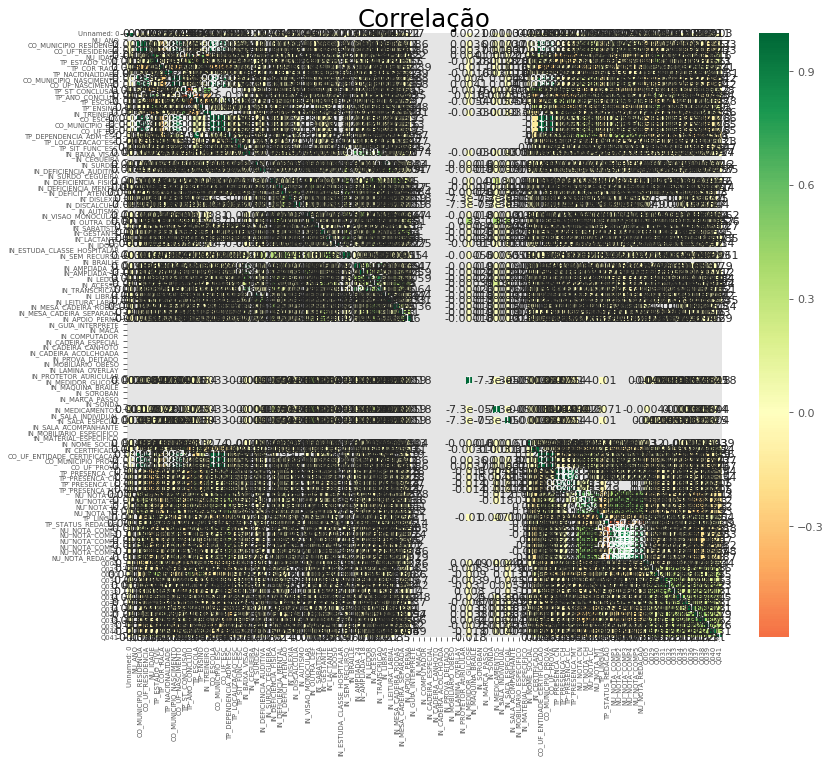

In [86]:
#Mostando as relações entre os atributos (NÃO DEU CERTO !)
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(enemTrain.corr(), xticklabels=enemTrain.corr().columns, yticklabels=enemTrain.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlação', fontsize=22)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

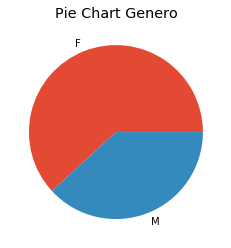

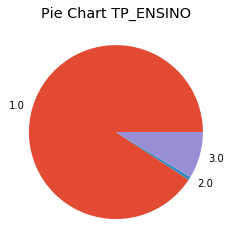

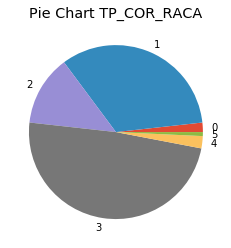

In [110]:
#Realizando algumas analises
df = enemTrain.groupby('TP_SEXO').size()

df.plot(kind='pie', subplots=True, figsize=(8, 4))
plt.title("Pie Chart Genero")
plt.ylabel("")
plt.show()


df = enemTrain.groupby('TP_ENSINO').size()

df.plot(kind='pie', subplots=True, figsize=(8, 4))
plt.title("Pie Chart TP_ENSINO")
plt.ylabel("")
plt.show()

df = enemTrain.groupby('TP_COR_RACA').size()

df.plot(kind='pie', subplots=True, figsize=(8, 4))
plt.title("Pie Chart TP_COR_RACA")
plt.ylabel("")
plt.show()

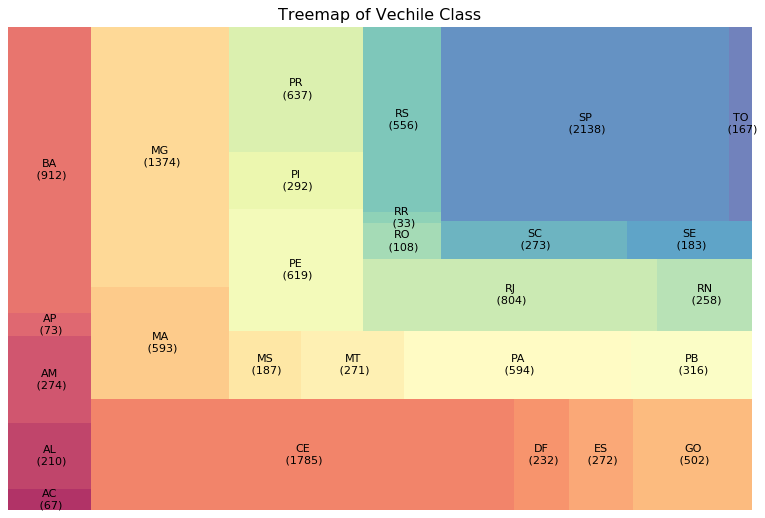

In [116]:
import squarify 

df_raw = enemTrain

df = df_raw.groupby('SG_UF_RESIDENCIA').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()

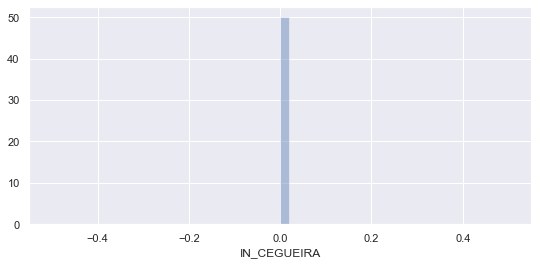

In [158]:
sns.set(rc={'figure.figsize':(9,4)})
sns.distplot(enemTrain['IN_CEGUEIRA']);

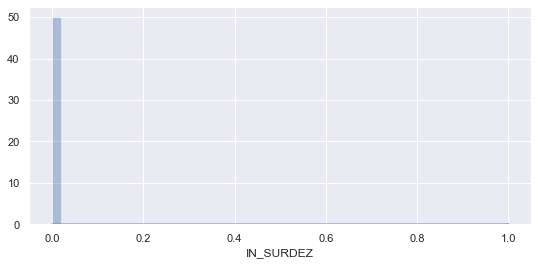

In [157]:
sns.set(rc={'figure.figsize':(9,4)})
sns.distplot(enemTrain['IN_SURDEZ']);

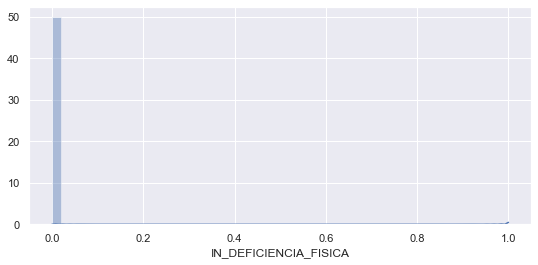

In [156]:
sns.set(rc={'figure.figsize':(9,4)})
sns.distplot(enemTrain['IN_DEFICIENCIA_FISICA']);

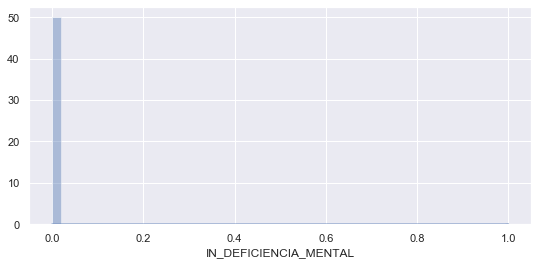

In [159]:
sns.set(rc={'figure.figsize':(9,4)})
sns.distplot(enemTrain['IN_DEFICIENCIA_MENTAL']);

</h2>Análise da base sobre o atributo a ser previsto NU_NOTA_MT </h2>

In [92]:
#Análise estatística
enemTrain['NU_NOTA_MT'].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

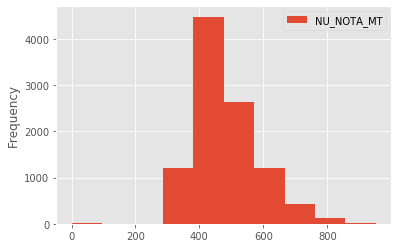

In [93]:
#Frequencia 
enemTrain.plot.hist(y='NU_NOTA_MT')

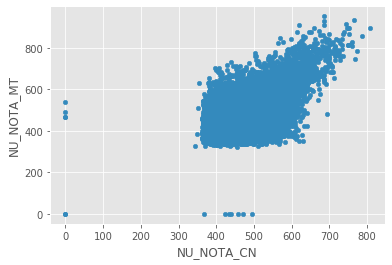

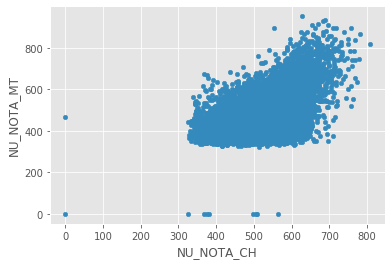

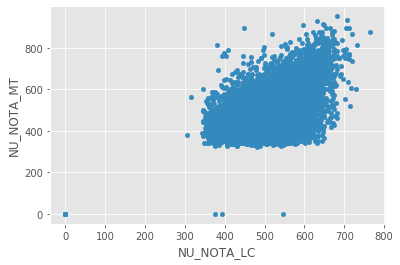

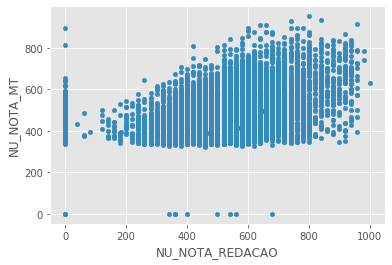

In [105]:
#Relação entre Nota de matemáticas e outras matérias
enemTrain.plot.scatter(x='NU_NOTA_CN', y='NU_NOTA_MT')
enemTrain.plot.scatter(x='NU_NOTA_CH', y='NU_NOTA_MT')
enemTrain.plot.scatter(x='NU_NOTA_LC', y='NU_NOTA_MT')
enemTrain.plot.scatter(x='NU_NOTA_REDACAO', y='NU_NOTA_MT')

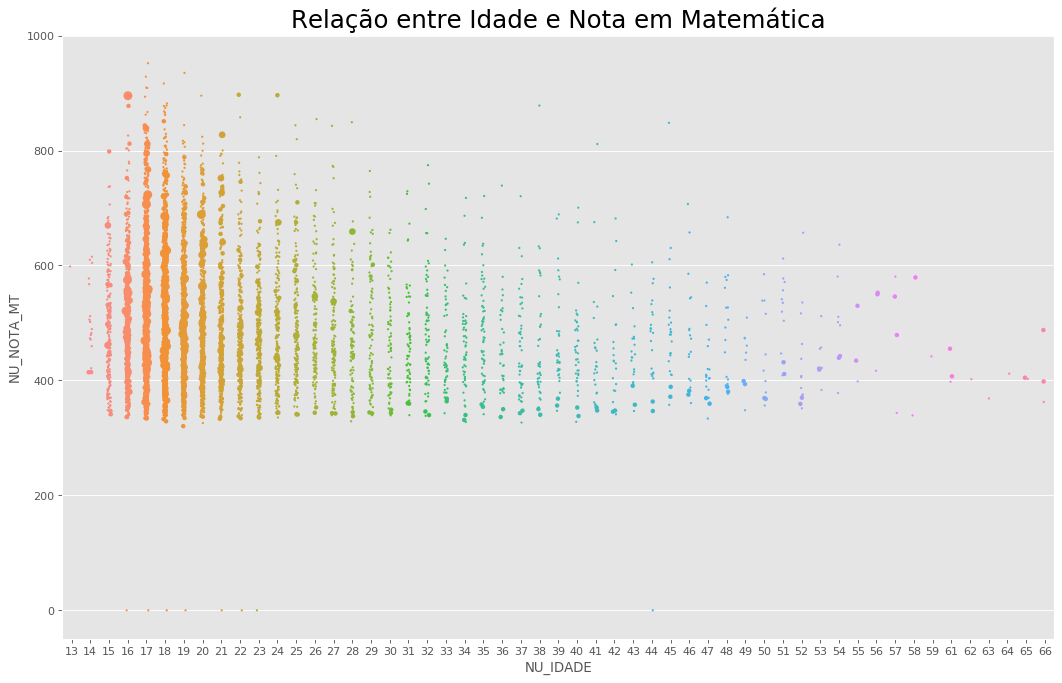

In [102]:

df_counts = enemTrain.groupby(['NU_NOTA_MT', 'NU_IDADE']).size().reset_index(name='counts')

# Desenhar Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.NU_IDADE, df_counts.NU_NOTA_MT, size=df_counts.counts*2, ax=ax)


plt.title('Relação entre Idade e Nota em Matemática', fontsize=22)
plt.show()

<h1>Prevendo a Nota de Matemática</h1>

In [16]:
#Para vermos as colunas que possuem maior correlação
aux = enemTrain.copy()
aux2 = enemTrain.copy()

aux = aux.loc[:, enemTest.columns]
aux['NU_NOTA_MT'] = aux2.NU_NOTA_MT

c = aux.corr()
c.NU_NOTA_MT.sort_values()

TP_LINGUA                -0.201726
TP_COR_RACA              -0.157364
TP_ST_CONCLUSAO          -0.087869
TP_ENSINO                -0.086353
NU_IDADE                 -0.061485
TP_STATUS_REDACAO        -0.059376
TP_NACIONALIDADE         -0.034965
IN_TREINEIRO             -0.022287
IN_SABATISTA             -0.016459
IN_SURDEZ                -0.015249
IN_IDOSO                 -0.011336
IN_GESTANTE              -0.000945
IN_BAIXA_VISAO            0.000685
IN_DISLEXIA               0.001453
TP_PRESENCA_CN            0.003552
TP_PRESENCA_CH            0.003552
IN_DISCALCULIA            0.009813
TP_ANO_CONCLUIU           0.029039
TP_ESCOLA                 0.069304
CO_UF_RESIDENCIA          0.107493
NU_NOTA_COMP1             0.299402
NU_NOTA_COMP2             0.335638
NU_NOTA_COMP4             0.342282
NU_NOTA_COMP5             0.343337
NU_NOTA_COMP3             0.350307
TP_DEPENDENCIA_ADM_ESC    0.373233
NU_NOTA_REDACAO           0.379376
NU_NOTA_LC                0.494695
NU_NOTA_CH          

In [33]:
#Separando para trabalhar só com o que importa - tem maior relação
new_vector_training = [
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_COMP3',
    'NU_NOTA_REDACAO',
    'NU_NOTA_LC',
    'NU_NOTA_CH',
    'NU_NOTA_CN',
    'NU_NOTA_MT'
]

new_vector_test = [
    'NU_INSCRICAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_COMP3',
    'NU_NOTA_REDACAO',
    'NU_NOTA_LC',
    'NU_NOTA_CH',
    'NU_NOTA_CN'
]

enemTrain_data = enemTrain.copy()
enemTrain_data = enemTrain_data.loc[:, new_vector_training]
enemTrain_data.dropna(subset=['NU_NOTA_MT'], inplace=True)
enemTrain_data.head()

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_COMP3,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT
0,120.0,120.0,80.0,80.0,120.0,520.0,581.2,495.4,436.3,399.4
1,140.0,120.0,120.0,80.0,120.0,580.0,599.0,544.1,474.5,459.8
5,120.0,120.0,160.0,100.0,120.0,620.0,410.9,583.2,439.7,364.5
6,100.0,120.0,120.0,100.0,120.0,560.0,484.5,604.2,420.1,529.2
7,140.0,120.0,120.0,120.0,120.0,620.0,611.2,625.8,619.6,566.7


In [34]:
y = enemTrain_data.NU_NOTA_MT
X = enemTrain_data.drop(['NU_NOTA_MT'], axis=1)

enem_validation_data = enemTest.copy()
enem_validation_data_1 = enem_validation_data.loc[:, new_vector_test]
enem_validation_data_2 = enem_validation_data.loc[:, new_vector_test]

In [35]:
enem_train_X, enem_validation_X, enem_train_y, enem_validation_y = train_test_split(X, y, random_state = 0)

In [36]:
model = XGBRegressor(n_estimators=200, learning_rate=0.1)
model.fit(enem_train_X, enem_train_y, early_stopping_rounds=5, eval_set=[(enem_validation_X, enem_validation_y)], verbose=False)



[19:37:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [37]:
enem_validation_data_1.drop(['NU_INSCRICAO'], axis=1, inplace=True)

In [49]:
predicted_nota = model.predict(enem_validation_data_1)
result_df = pd.DataFrame({'NU_INSCRICAO': enem_validation_data_2['NU_INSCRICAO'], 'NU_NOTA_MT': predicted_nota})


In [50]:
result_df.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,425.456940
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,449.537048
2,b38a03232f43b11c9d0788abaf060f7366053b6d,593.806519
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,85.956123
4,715494628a50142ce8cb17191cfe6d0f3cae0934,549.314697


In [51]:
#Verifica se tem valores nulos no result
result_df.isnull().any().any()

False

In [118]:
result_df['NU_NOTA_MT'].describe()

count    4576.000000
mean      379.402039
std       181.166260
min        20.623615
25%       101.885212
50%       443.559570
75%       481.157425
max       853.667114
Name: NU_NOTA_MT, dtype: float64

In [52]:
result_df_final = result_df.loc[: , ['NU_INSCRICAO', 'NU_NOTA_MT']]
result_df.to_csv('answer.csv', index=False)
